# Abstract

In this lab assignment, we conducted experiments to find the gain and measurements of the dark current of a CCD. These experiments were performed because they allowed us to determine other calibration values of a CCD such as read noise, linearity in addition to determining the gain and dark current. The measurements of the dark current also allows us to determine the the difference between the bandgap energy for the semiconductor for the CCD by fitting the curve of the equation for dark current to the experimental curve of the dark current. In order to calculate the gain, we found the slope for the variance of the pixel values for 5 different exposure times versus the mean pixel values for 5 different sets of exposure times. When finding measurments for the dark current, we subtacted the bias frames from our measurements of the dark current and plotted our values for the dark current against temperature. The assignment was concluded by comparing the values for the gain to theoretical values and the graph of the dark current was fitted to the plot of the time dependent equation for dark current.          

# Introduction

Determining the calibration values for a CCD is important because it allows us to distinguish between characteristics in the data that originates from the CCD and the characteristics in the data that originates from the object that is observed. The determination of the signal to noise ratio of an observed object is an example of the importance of the calibration values for a CCD because the denominator of the "CCD Equation", which calculates the signal to noise ratio depends on the calibration values of the CCD. When calculating the read-noise for the CCD, we are interested in determining the gain because we want to use the value for the gain to convert the read-noise in terms of electrons. When we calculate measurments for the read-noise from the CCD these values are in Analog-Digital Units (ADU). In order to convert the read-noise in terms of electrons, we want to calculate the camera gain of the CCD because the gain is defined as the conversion factor between electrons and ADU and has units of photoelectrons per ADU. Because the read-noise is the standard deviation between the average value for pixels taken from a set of frames, our experiment will involve determining the statistical properties of sets of frames taken at different exposure times. The qualitative definition for the read noise is that it represents the value for the uncertainty of pixel values in a given frame. The uncertainty from the read-noise is caused by the amplification which leads to the data from the CCD being read to the computer.      

In the second part of this lab assignment we determined more values for the calibration of the CCD by measuring the dark current of the CCD at different temperatures. Measuring the value for the dark current at different temperatures is important because the pixel values in a frame are slightly increased by the internal thermal excitations of the CCD. The dark current is an interal part of the measurement of a dark frame, which is the amount of response that a CCD has when it is not collecting data from an object. Knowing the amount of increase in the pixel values from the dark current allows us to account for this increase in value in the data from observations of an object. In addition, the calibration value for the difference in the bandgap energy for the semiconductor is proportional to the value of the dark current and determining the plot for the dark current as a fuction of temperature allows us to measure the value for the difference in the bandgap energy.    

# Theory

When we calculated the gain of the CCD, we collected data sets from five different exposure times. We collected data sets at different exposure times because we wanted to create a graph with different values for the variance of the pixel values for a given set of frames on the y axis and the average pixel value for a given set of frames on the x axis. Calculating the variance of the average pixel values for a given set of frames is valid because the variance of the average pixel values for a given set of frames is equal to the square of the read-noise because the read-noise is equal to the standard deviation. For each exposure time we collected four different frames. After collecting the data we calculated the average pixel values for the each of the given sets of data these average pixel values were placed into an array and from this array we calculated the mean and variance of the pixel values.

Performing these calculations for each of the sets of data for the different exposure times allowed us to compute the gain because the equation $\sigma = \sqrt{\frac{N}{g}}$ relates the variance and the mean pixel values to the gain. In this equation, $\sigma$ is equal to the read-noise in ADU, g is equal to the gain and N is equal to the mean pixel value for a given data set. When both sides of the equation are squared we see that the square of the read-noise is equal to the mean pixel value multipled by one over the gain, if we consider the mean pixel value as an independant variable and the square of the read-noise as the dependant variable we see that the plot of the square of the read-noise vs. the mean pixel value is a straight line that contains a slope of one over the gain and a y intercept of zero. In the graphs obtained for this experiment we see that the y intercept is not equal to zero, this is caused by contributions to the read-noise from the bias. These contributions can be found by measuring the averages for the pixel values from a set of bias frames. The equation $\sigma = \sqrt{\frac{N}{g}}$ is derived from the fact that the Poisson distribution states that the standard deviation $\sigma$ is equal to the square root of the number of detections N, $\sigma = \sqrt{{N}}$. In this case the gain is equal to one, if we wanted to solve for the read-noise in terms of electrons we use the equation $\sigma = \sqrt{N*g}$. Because the read-noise in terms of ADU is calculated by dividing the read-noise in terms of electrons by the gain, we obtain the first equation by dividing $\sqrt{N*g}$ by the gain g.  

In the formula that was used for measuring the dark current constant and the bandgap for silicon, the dark current is proportional to $A*(T^\frac{3}{2})*\exp(\frac{-E}{2kT})$. In this equation A is equal to the dark current constant, E is equal to the bandgap energy for the semiconductor, k is equal to the Boltzman constant and T is equal to the temperature of the detector. When plotting the dark current as a function of temperature we expect to see a curve with an increasing slope based on the temperature dependant equation for the dark current. The pixel values for the dark current are dependant on temperature because the read-noise from the dark depends on thermal excitations instead of a photon flux.    

# Experiment and Methodology

The first two blocks of code were repeated for five times for sets of files containing different exposure times. In the first block of code the fits files are read by a for loop and the pixel values are placed into an array. 

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import numpy as np
#setup an array
point_two_sec = []
for i in range(1,5): #read data in from a fit file and place it into an array
    point_two_sec.append(fits.getdata("gains.0000000{}.fit".format(i) , ext=0).astype(np.int))

In [22]:
#mean of point_two_sec
avgains_point_two = sum(point_two_sec)/4 #calculates the average pixel value for a given pixel in all four of the frames  
print(avgains_point_two) #this prints an array for the in
print(avgains_point_two.mean())
print(avgains_point_two.var())
readnoise_point_two = (avgains_point_two.var())**0.5 #calculates a value for the read noise for the first exposure time.
print("The read-noise in ADU is", readnoise_point_two)

[[ 14343.5   14372.5   14423.5  ...,  14418.    14378.25  14448.25]
 [ 14441.    14263.    14455.5  ...,  14278.    14297.75  14293.  ]
 [ 14413.25  14401.    14466.   ...,  14261.25  14312.5   14230.25]
 ..., 
 [ 14423.5   14321.25  14331.25 ...,  14376.75  14327.75  14386.25]
 [ 14489.5   14468.75  14405.75 ...,  14379.5   14505.    14294.5 ]
 [ 14426.75  14282.5   14364.25 ...,  14410.25  14352.75  14473.25]]
14397.6484065
5210.03499548
The read-noise in ADU is 72.1805721471


In [6]:
point_four_sec = []
for i in range(5,9):
    point_four_sec.append(fits.getdata("gains.0000000{}.fit".format(i) , ext=0).astype(np.int))

In [21]:
#mean of point_four_sec
avgains_point_four = sum(point_four_sec)/4
print(avgains_point_four)
print(avgains_point_four.mean())
print(avgains_point_four.var())
readnoise_point_four = (avgains_point_four.var())**0.5 #calculates a value for the read noise for the first exposure time.
print("The read-noise in ADU is", readnoise_point_four)

[[ 21124.25  21055.25  21065.5  ...,  21126.5   21073.75  21154.5 ]
 [ 21100.75  21011.5   21261.75 ...,  20942.    20900.25  20987.25]
 [ 21093.5   21119.25  21210.   ...,  20939.75  20924.75  21154.25]
 ..., 
 [ 20946.75  21314.25  21095.   ...,  20971.    21140.75  21140.  ]
 [ 21181.5   21158.25  21285.5  ...,  21150.    21182.5   21176.75]
 [ 21212.75  21195.5   20938.   ...,  21057.5   20968.75  20959.75]]
21120.9254003
13362.5046616
The read-noise in ADU is 115.59630038


In [8]:
point_six_sec = []
point_six_sec.append(fits.getdata("gains.00000009.fit".format(i) , ext=0).astype(np.int))
for i in range(10,13):
    point_six_sec.append(fits.getdata("gains.000000{}.fit".format(i) , ext=0).astype(np.int))

In [23]:
#mean of point_six_sec
avgains_point_six = sum(point_six_sec)/4
print(avgains_point_six)
print(avgains_point_six.mean())
print(avgains_point_six.var())
readnoise_point_six = (avgains_point_six.var())**0.5 #calculates a value for the read noise for the first exposure time.
print("The read-noise in ADU is", readnoise_point_six)

[[ 27627.25  27674.    27566.   ...,  27576.75  27636.75  27811.5 ]
 [ 27603.75  27580.5   27706.5  ...,  27522.5   27366.    27776.  ]
 [ 27622.75  27772.75  27799.25 ...,  27575.25  27562.    27633.25]
 ..., 
 [ 27826.    27807.75  27717.75 ...,  27712.75  27697.    27668.75]
 [ 27478.75  27713.    27609.25 ...,  27696.75  27595.75  27871.75]
 [ 27807.    27612.25  27582.5  ...,  27744.25  27774.    27728.75]]
27753.093745
24199.1467236
The read-noise in ADU is 155.560749303


In [10]:
point_eight_sec = []
 
for i in range(13,17):
    point_eight_sec.append(fits.getdata("gains.000000{}.fit".format(i) , ext=0).astype(np.int))

In [54]:
#mean of point_eight_sec
avgains_point_eight = sum(point_eight_sec)/4
print(avgains_point_eight)
print(avgains_point_eight.mean())
print(avgains_point_eight.var())
readnoise_point_eight = (avgains_point_eight.var())**0.5 #calculates a value for the read noise for the first exposure time.
print("The read-noise in ADU is", readnoise_point_eight)

[[ 34361.    34065.5   34231.   ...,  34356.5   33857.5   34031.  ]
 [ 34063.5   34104.5   34687.75 ...,  33936.25  33937.5   34225.25]
 [ 34235.75  34353.5   34195.25 ...,  34175.5   34055.75  34067.  ]
 ..., 
 [ 34210.    34094.75  34260.5  ...,  34368.75  34155.5   34130.75]
 [ 34046.75  34007.75  34394.5  ...,  33998.25  34064.    34159.25]
 [ 34284.25  34311.    34154.5  ...,  34406.5   34281.75  34257.  ]]
34283.589147
35341.6637767
The read-noise in ADU is 187.993786537


In [12]:
one_sec = []
 
for i in range(17,21):
    one_sec.append(fits.getdata("gains.000000{}.fit".format(i) , ext=0).astype(np.int))

In [55]:
#mean of one_sec
avgains_one = sum(one_sec)/4
print(avgains_one)
print(avgains_one.mean())
print(avgains_one.var())
readnoise_one = (avgains_one.var())**0.5 #calculates a value for the read noise for the first exposure time.
print("The read-noise in ADU is", readnoise_one)

[[ 40673.5   39840.    40580.75 ...,  40435.75  39998.25  40590.5 ]
 [ 40604.5   39461.75  40874.5  ...,  40510.25  40306.75  40535.5 ]
 [ 40530.25  40166.25  40788.   ...,  40327.5   40100.5   40559.25]
 ..., 
 [ 40829.5   40155.25  40911.75 ...,  40857.75  40102.5   40428.75]
 [ 40658.25  40231.    40856.75 ...,  40631.5   39968.25  40728.  ]
 [ 40983.25  40183.    40498.5  ...,  40768.75  39941.75  40535.25]]
40549.5533931
100914.621089
The read-noise in ADU is 317.670617289


In the next block of code, the graph of the variance of the pixel values for the average pixels for a set of fits files for a given exposure time vs the mean pixel value for a set of frames at a given exposure time is generated. We see that after fitting the line we have a slope of 1.52638652713 with a gain of 0.655142051.  

When we originally plotted for the graph of the variance vs mean, we saw that the values for a one second exposure did not fit well with the rest of our data and created a two component fit that quickley increased in slope after the value for the 0.8 second exposure. With this non-linearity we dropped the data point for the one second exposure and the graph appeared linear again with a consistant slope. Based on the original non-linear graph, we have found evidence that non-linearity is directley proportional to the exposure time. With the non-linearity of the graph occuring at a short exposure time of one second, the full well depth of the detector is not large. We checked our data with an integration time vs means plot, which generated a linear plot. A histogram of the pixel values is also featured.  

(-0.4, 1.4)

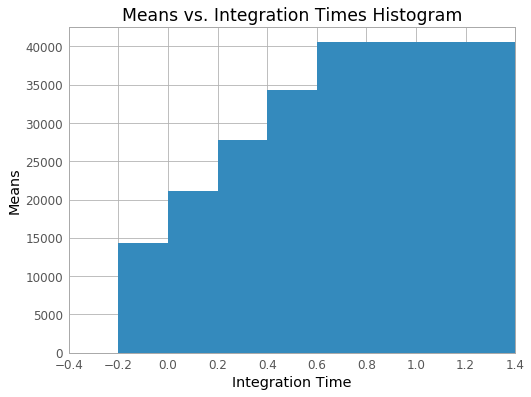

In [58]:
#Histogram of the values for the means at different integration times
means = [avgains_point_two.mean(), avgains_point_four.mean(), avgains_point_six.mean(), avgains_point_eight.mean(), avgains_one.mean() ]
inttime = [0.2, 0.4, 0.6, 0.8, 1.0]
plt.bar(inttime, means)
plt.title('Means vs. Integration Times Histogram' )
plt.xlabel('Integration Time')
plt.ylabel('Means')
plt.xlim(-0.4,1.4)

The slope is: 1.52638652713
The gain is: 0.655142051


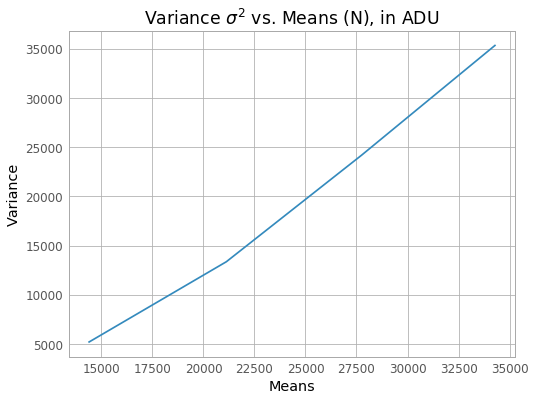

In [16]:
from scipy.stats import linregress
means = [avgains_point_two.mean(), avgains_point_four.mean(), avgains_point_six.mean(), avgains_point_eight.mean(),   ]
variances = [avgains_point_two.var(), avgains_point_four.var(), avgains_point_six.var(), avgains_point_eight.var(),  ]
print('The slope is:',linregress(means,variances).slope)
print('The gain is:', 1/linregress(means,variances).slope)
plt.plot(means,variances)
#we dropped the last data point not sure why it gave us a two component fit but the integration time plot is linear
plt.title('Variance $\sigma^2$ vs. Means (N), in ADU')
plt.ylabel('Variance')
plt.xlabel('Means')

The slope is: 3.2370391191
The gain is: 0.308924286426


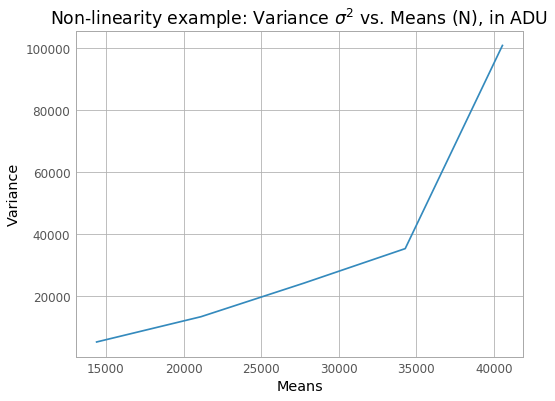

In [19]:
from scipy.stats import linregress
means = [avgains_point_two.mean(), avgains_point_four.mean(), avgains_point_six.mean(), avgains_point_eight.mean(), avgains_one.mean() ]
variances = [avgains_point_two.var(), avgains_point_four.var(), avgains_point_six.var(), avgains_point_eight.var(), avgains_one.var()  ]
print('The slope is:',linregress(means,variances).slope)
print('The gain is:', 1/linregress(means,variances).slope)
plt.plot(means,variances)
#we dropped the last data point not sure why it gave us a two component fit but the integration time plot is linear
plt.title('Non-linearity example: Variance $\sigma^2$ vs. Means (N), in ADU')
plt.ylabel('Variance')
plt.xlabel('Means')

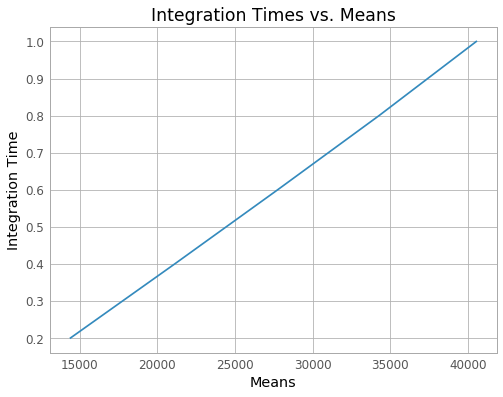

In [17]:
#integration time result
means = [avgains_point_two.mean(), avgains_point_four.mean(), avgains_point_six.mean(), avgains_point_eight.mean(), avgains_one.mean() ]
inttime = [0.2, 0.4, 0.6, 0.8, 1.0]
plt.plot(means,inttime)
plt.title('Integration Times vs. Means')
plt.ylabel('Integration Time')
plt.xlabel('Means')

In the block of code below the read-nosie values are converted from units of ADU to units of electrons by muliplying the values for the read-noise in ADU by the gain. The digitizer converts the read-noise in terms of electrons to terms of ADU because the pixel response values need to be an integer number when it is read in by the computer. Another method for determining the read-noise involves the bias frames because the uncertainity is internally caused by reading in data to the computer and is not from an outside source.    

In [30]:
g = 0.655142051 #the gain
readnoise_point_two_elec = readnoise_point_two*g
readnoise_point_four_elec = readnoise_point_four*g
readnoise_point_six_elec = readnoise_point_six*g
readnoise_point_eight_elec = readnoise_point_eight*g
readnoise_one_elec = readnoise_one*g
print("The read-noise for a 0.2 second exposure in terms of electrons is: ", readnoise_point_two_elec )
print("The read-noise for a 0.4 second exposure in terms of electrons is: ", readnoise_point_four_elec )
print("The read-noise for a 0.6 second exposure in terms of electrons is: ", readnoise_point_six_elec )
print("The read-noise for a 0.8 second exposure in terms of electrons is: ", readnoise_point_eight_elec )
print("The read-noise for a 1.0 second exposure in terms of electrons is: ", readnoise_one_elec )

The read-noise for a 0.2 second exposure in terms of electrons is:  47.2885280788
The read-noise for a 0.4 second exposure in terms of electrons is:  75.7319973192
The read-noise for a 0.6 second exposure in terms of electrons is:  101.914388353
The read-noise for a 0.8 second exposure in terms of electrons is:  123.162634887
The read-noise for a 1.0 second exposure in terms of electrons is:  208.119379753


For the second part of this lab assignment we first created a plot of pixel values from the dark current as a function of temperature. We expect that the CCD will have a significant dark current because the internal fan is not as efficient as a source for cooling as liquid nitrogen. Before the graph was completed, the pixel values from the dark current were subtracted by the pixel values for the bias frames because the value for the pixels from the dark current are defined as the data of a pixel value from a dark frame minus the average pixel value for a certain pixel from a set of bias frames. We want to get rid of the noise that is from the bias values so that we can discern the pixel values originating from the dark current more clearly. The two blocks of code below obtain values for the average pixel value for a certain pixel in a set of bias frames that is at the same temperature as the pixel values from the dark current. These two blocks of code were complted six times to account for the pixel values that are due to the dark current at different temperatures. IN the code the average pixel value for a certain pixel in a set of bias frames is subtracted from the pixel values from the dark current. The means for the resulting pixel values are displayed

In [31]:
bias_one = []
for i in range(1,10): #use a for loop to place the pixel values for the bias frames into an array
    bias_one.append(fits.getdata("bias1.0000000{}.HIP 79622.Bias.fit".format(i) , ext=0).astype(np.int))
for i in range(10,12):
    bias_one.append(fits.getdata("bias1.000000{}.HIP 79622.Bias.fit".format(i) , ext=0).astype(np.int))
avbias_one = sum(bias_one)/11 #creates an array with the average pixel values for a certain pixel from all of the bias frames

In [32]:
dark_one = []
for i in range(1,4): #use a for loop to place the pixel values for the dark frame into an array
    dark_one.append(fits.getdata("dark1.0000000{}.HIP 79622.Dark.fit".format(i) , ext=0).astype(np.int))
dark_one_sub_bias = [da - avbias_one for da in dark_one] #subtract by the average pixel values for the bias frame for a given pixel

print(dark_one_sub_bias[0].mean())

152.395938135


In [33]:
bias_two = []
for i in range(1,10):
    bias_two.append(fits.getdata("bias2.0000000{}.HIP 79622.Bias.fit".format(i) , ext=0).astype(np.int))
for i in range(10,12):
    bias_two.append(fits.getdata("bias2.000000{}.HIP 79622.Bias.fit".format(i) , ext=0).astype(np.int))
avbias_two = sum(bias_two)/11

In [34]:
dark_two = []
for i in range(1,4):
    dark_two.append(fits.getdata("dark2.0000000{}.HIP 79622.Dark.fit".format(i) , ext=0).astype(np.int))
dark_two_sub_bias = [da - avbias_two for da in dark_two] 

print(dark_two_sub_bias[0].mean())

190.095910749


In [35]:
bias_three = []
for i in range(1,10):
    bias_three.append(fits.getdata("bias3.0000000{}.HIP 79622.Bias.fit".format(i) , ext=0).astype(np.int))
for i in range(10,12):
    bias_three.append(fits.getdata("bias3.000000{}.HIP 79622.Bias.fit".format(i) , ext=0).astype(np.int))
avbias_three = sum(bias_three)/11

In [36]:
dark_three = []
for i in range(2,5):
    dark_three.append(fits.getdata("dark3.0000000{}.HIP 79622.Dark.fit".format(i) , ext=0).astype(np.int))
dark_three_sub_bias = [da - avbias_three for da in dark_three]

print(dark_three_sub_bias[0].mean())

239.759646569


In [37]:
bias_four = []
for i in range(1,10):
    bias_four.append(fits.getdata("bias4.0000000{}.HIP 79622.Bias.fit".format(i) , ext=0).astype(np.int))
for i in range(10,12):
    bias_four.append(fits.getdata("bias4.000000{}.HIP 79622.Bias.fit".format(i) , ext=0).astype(np.int))
avbias_four = sum(bias_four)/11

In [38]:
dark_four = []
for i in range(1,4):
    dark_four.append(fits.getdata("dark4.0000000{}.HIP 79622.Dark.fit".format(i) , ext=0).astype(np.int))
dark_four_sub_bias = [da - avbias_four for da in dark_four]

print(dark_four_sub_bias[0].mean())

301.895080502


In [39]:
bias_five = []
for i in range(1,10):
    bias_five.append(fits.getdata("bias5.0000000{}.HIP 79622.Bias.fit".format(i) , ext=0).astype(np.int))
for i in range(10,12):
    bias_five.append(fits.getdata("bias5.000000{}.HIP 79622.Bias.fit".format(i) , ext=0).astype(np.int))
avbias_five = sum(bias_five)/11

In [40]:
dark_five = []
for i in range(1,4):
    dark_five.append(fits.getdata("dark5.0000000{}.HIP 79622.Dark.fit".format(i) , ext=0).astype(np.int))
dark_five_sub_bias = [da - avbias_five for da in dark_five]

print(dark_five_sub_bias[0].mean())

382.004280958


In [41]:
bias_six = []
for i in range(1,10):
    bias_six.append(fits.getdata("bias6.0000000{}.HIP 79622.Bias.fit".format(i) , ext=0).astype(np.int))
for i in range(10,12):
    bias_six.append(fits.getdata("bias6.000000{}.HIP 79622.Bias.fit".format(i) , ext=0).astype(np.int))
avbias_six = sum(bias_six)/11

In [42]:
dark_six = []
for i in range(1,4):
    dark_six.append(fits.getdata("dark6.0000000{}.HIP 79622.Dark.fit".format(i) , ext=0).astype(np.int))
dark_six_sub_bias = [da - avbias_six for da in dark_six]

print(dark_six_sub_bias[0].mean())

492.37894403


With the mean values for the pixel values from the dark current minus the average bias frame values, the means are placed into an array for our y axis inthe graph and the x axis consists of the values for temperature. We see that the graph consists of a curve with an increasing slope as was expected given the  equation for the dark current pixel values. 

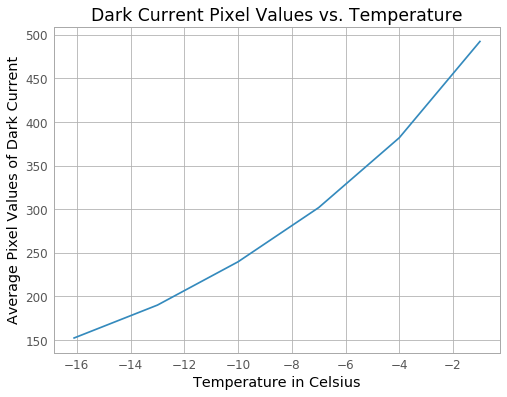

In [44]:
dark_means = [dark_one_sub_bias[0].mean(), dark_two_sub_bias[0].mean(), dark_three_sub_bias[0].mean(), dark_four_sub_bias[0].mean(), dark_five_sub_bias[0].mean(), dark_six_sub_bias[0].mean() ]
temp = [-16.1, -13.0, -10.0, -7.0, -4.0, -1.0] # the temperature values for each dark current observation
plt.plot(temp,dark_means)
plt.title('Dark Current Pixel Values vs. Temperature')
plt.xlabel('Temperature in Celsius')
plt.ylabel('Average Pixel Values of Dark Current')

In order to complete part two of this experiment, I attempted to calculate the values for the dark current constant and the difference between the bandgap energy for the semiconductor by fitting the curve from the equation given for the variation of the dark current to the curve produced by the data in the first graph for the dark current as a function of temperature. From the curve fitted graph below the fit of the curve has the same shape of the data curve but the y values are not accurate. From the curve fitting, the value for the dark current constant is 6.57158685654 and the bandgap energy is 0.0112962483018. The value for the bandgap energy is not correct when compared to the 1.11 eV value for the bandgap energy of silicon from Wikipedia. I also converted the temperatures to Kelvin in the x axis to see if this wolud lead me to the correct results, when I did the conversions I obtained the same value for the dark current constant and the value of the bandgap energy was increased to a value of 0.205738845763, but the y values of the fitted curve were increased to a values much larger than the y values for the original data curve and the shape of the curves in the resulting graphs is not discernable because of the large vertical distance between the curves. 

In [45]:
k = 0.000086173303   #the Boltzman constant  
a,e=(6.57158685654,0.00202304705649) #test values
def func0 (x,a,e,k):
    return a*(x**(3/2))*np.exp(-e/(2*(k)*x)) #the fucntion for the dark current

In [46]:
from scipy.optimize import curve_fit 
dark_means = [dark_one_sub_bias[0].mean(), dark_two_sub_bias[0].mean(), dark_three_sub_bias[0].mean(), dark_four_sub_bias[0].mean(), dark_five_sub_bias[0].mean(), dark_six_sub_bias[0].mean() ]
temp = [1.0, 4.0, 7.0, 10.0, 13.0, 16.1]
# note the values for the temerature were shifted on the x axis to positive values
# when xmin xmax was negative an error message:
# RuntimeWarning: invalid value encountered in power after removing the cwd from sys.path.
xmin,xmax = (1,16.1)
N = 500
xvals = np.random.uniform(xmin, xmax, N)
yvals = func0(xvals,a,e,k)
def func0 (x,a,e,k):
    return a*(np.power(x,1.5))*np.exp(-e/(2*(k)*x))

# estimates for the parameters
a0,e0 = (10.0,0.00000001)

a=10.0, e=1e-08


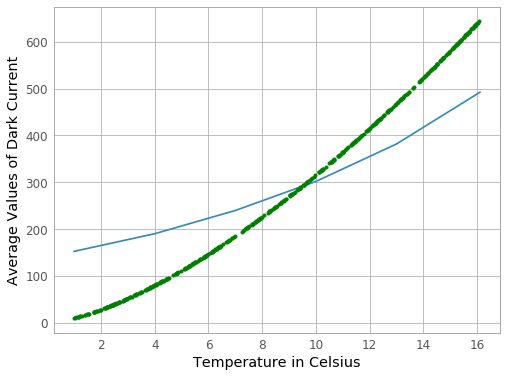

In [47]:
at,et = (10.0,0.00000001)
plt.plot(temp,dark_means)
plt.plot(xvals,func0(xvals,at,et,k), 'g.')
print ("a=%s, e=%s" % (at,et))
plt.xlabel('Temperature in Celsius')
plt.ylabel('Average Values of Dark Current')
plt.show() #plot from estimated values of a and e

a=6.57158685654, e=0.0112962483018


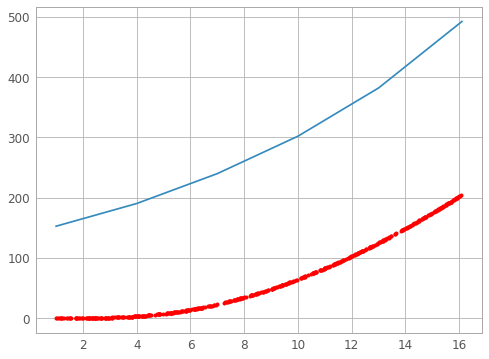

In [50]:
coeffs, fiterr = curve_fit(func0, xvals, yvals, p0=(at,et,k)) #fitting the curve


print ("a=%s, e=%s" % (coeffs[0], coeffs[1]))
plt.plot(temp,dark_means)
plt.plot(xvals,func0(xvals,*coeffs),'r.')
plt.show()

# Summary

In part one of this experiment, we created a plot of the variance of the average pixel values for different exposure times versus the mean pixel value of the average pixel values for a set of frames at a certain exposure times. This plot allowed us to determine the gain. The gain is defined as one divided by the slope because the square of the read-noise is defined as the variance and is equal to the mean pixel value of the average pixel values divided by the gain in units of ADU. We wanted to calculated the gain because the gain is a conversion factor that converts the read-noise in ADU to the read-noise in terms of electrons. Computing the variance vs means graph also allowed us to determine if the full well depth of the detector was large by allowing us to observe the linearity of the graph. 

In the second part of this experiment, we plotted the pixel values for the dark current subtacted by the bias frames as a function of temperature. The value for each pixel in the dark frame at a given temperature was subtracted by the average pixel values from bias frames at given temperatures so that the pixel values that were not from the dark current were eliminated. This task was completed in order to obtain a dark frame that only contained pixel values that are from the contributions of the dark current. With an array of pixel values originating only from the dark current, we found the value for the mean pixel values of the dark frame at each temperature and these values were graphed as a function of temperature. The last part of the lab was attempted by obtaining values for the dark current constant and the bandgap energy by attempting to fit a curve of the dark current equation to the curve produced by our data.   

# Conclusions

According to the graph of the Variance $\sigma^2$ vs. Means (N), in ADU the gain of the CCD is equal to 0.655142051. Our obtained value for the gain is smaller than the given value of the gain for the MDM4K detector, which is equal to 2.2-2.4 electrons per ADU. We conclude that the full well depth of the detector is small because the Variance $\sigma^2$ vs. Means (N), in ADU graph becomes non-linear at a small exposure time of one second. The graph is linear to 187.993786537 ADU, this value is much smaller than the linearity value for the MDM4K detector, which has a value of 45000 ADU before the graph becomes non-linear. The read-noise for the first exposure time of 0.2 seconds in terms of electrons is equal to 47.2885280788, this value is larger than the read-noise of the MDM4K detector, which has a value of 5 electrons. When plotting the dark current as a function of temperature, we found that the graph produces a curve of increasing slope. This result was expected because the dark current equation produces a silmilar shaped graph. When attempting to fit the graph of the dark current equation to the graph from our data, we found that the value for the dark current constant is equal to 6.57158685654 and the value of the bandgap energy is 0.0112962483018. The value of the bandgap energy is incorrect because it is not close to the value of the bandgap energy of 1.11 for Silicon according to Wikipedia. When the temperature values are converted to Kelvin the bandgap energy is increased to a value of 0.205738845763, which is closer to 1.11 but the graph of the fitted curve is very inaccurate with large y values.     